In [20]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd '/content/gdrive/Othercomputers/My MacBook Pro (1)/project2/'
%pip install mlrose_hiive
import mlrose_hiive as mlrose
import numpy as np
import time
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/Othercomputers/My MacBook Pro (1)/project2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
## Neural network
import time
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, precision_score, accuracy_score, recall_score, roc_auc_score
import pickle
import matplotlib.pyplot as plt

In [22]:
FILE = './data/healthcare-dataset-stroke-data.csv'

dat = pd.read_csv(FILE)
# convert categorical to dummies
cats = ['gender','ever_married','work_type','Residence_type','smoking_status']
for v in cats:
    dat = pd.concat([dat,pd.get_dummies(dat[v], prefix=v)], axis = 1)
                     
x_cols = [
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

X_full = dat[x_cols].to_numpy()
y_full = np.array(dat.stroke)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Holdout validation data
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, \
                                                    test_size = 0.2, random_state = 3)


## Impute missing values 
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
IterativeImputer(random_state=0)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

# Normalize feature data
scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [72]:
# gradient descent

common_params = {'hidden_nodes':[100,100,100],'activation':'relu','curve':True,'random_state':0}

params = {'gradient_descent':{'algorithm':'gradient_descent','max_iters':5000,'learning_rate':.0001,'early_stopping': True,'max_attempts':1000},
          'random_hill_climb':{'algorithm':'random_hill_climb','max_iters':100,'restarts':10,'early_stopping':True},}

nn = mlrose.NeuralNetwork(**common_params, **params['gradient_descent'])
start_time = time.perf_counter()
nn.fit(X_train_scaled, y_train)
nn_time = time.perf_counter() - start_time


In [73]:
from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

print("Avg pred:", np.mean(y_train_pred), np.mean(y_test_pred))



0.9500978473581213
0.952054794520548
Avg pred: 0.0 0.003913894324853229


In [74]:
recall_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), roc_auc_score(y_test, y_test_pred)

(0.0, 0.0, 0.49795291709314227)

In [75]:
# hill climb

common_params = {'hidden_nodes':[100,100,100],'activation':'relu','curve':True,'random_state':0}

params['random_hill_climb'] = {'algorithm':'random_hill_climb','max_iters':1000,'restarts':1000,'early_stopping':True,'max_attempts':100}

rhc = mlrose.NeuralNetwork(**common_params, **params['random_hill_climb'])
start_time = time.perf_counter()
rhc.fit(X_train_scaled, y_train)
rhc_time = time.perf_counter() - start_time

# Predict labels for train set and assess accuracy
y_train_pred = rhc.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = rhc.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

print("Avg pred:", np.mean(y_train_pred), np.mean(y_test_pred))


KeyboardInterrupt: ignored

In [27]:
recall_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), roc_auc_score(y_test, y_test_pred)

(0.15555555555555556, 0.04895104895104895, 0.508176958944615)

In [62]:
# anneal 

common_params = {'hidden_nodes':[100,100,100],'activation':'relu','curve':True,'random_state':0}

params['simulated_annealing'] = {'algorithm':'simulated_annealing','max_iters':1000,'early_stopping':True,'max_attempts':5000,'schedule':mlrose.GeomDecay(init_temp=100)}

anneal = mlrose.NeuralNetwork(**common_params, **params['simulated_annealing'])
start_time = time.perf_counter()
anneal.fit(X_train_scaled, y_train)
anneal_time = time.perf_counter() - start_time

# Predict labels for train set and assess accuracy
y_train_pred = anneal.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = anneal.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

print("Avg pred:", np.mean(y_train_pred), np.mean(y_test_pred))

0.34711350293542076
0.31604696673189825
Avg pred: 0.6685420743639922 0.6986301369863014


In [63]:
recall_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), roc_auc_score(y_test, y_test_pred)

(0.6666666666666666, 0.04201680672268908, 0.4832821562606619)

In [30]:
# ga 

common_params = {'hidden_nodes':[100,100,100],'activation':'relu','curve':True,'random_state':0}

params['genetic_alg']={'algorithm':'genetic_alg','max_iters':1000,'early_stopping':True,'max_attempts':50,'pop_size':400}

ga = mlrose.NeuralNetwork(**common_params, **params['genetic_alg'])
start_time = time.perf_counter()
ga.fit(X_train_scaled, y_train)
ga_time = time.perf_counter() - start_time
# Predict labels for train set and assess accuracy
y_train_pred = ga.predict(X_train_scaled)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = ga.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

print("Avg pred:", np.mean(y_train_pred), np.mean(y_test_pred))

0.9508317025440313
0.9559686888454012
Avg pred: 0.001223091976516634 0.0019569471624266144


In [64]:
nn_time, rhc_time, anneal_time, ga_time

(491.49806985099895, 676.7967295959988, 81.05176983099955, 1150.6308311690009)

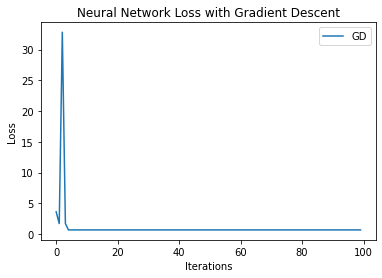

In [65]:
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title("Neural Network Loss with Gradient Descent")
ax.plot(list(range(0,100)),-nn.fitness_curve[0:100], label="GD")

ax.legend()
plt.savefig('./paper/figures/nn_gd.png', format='png', transparent=True)

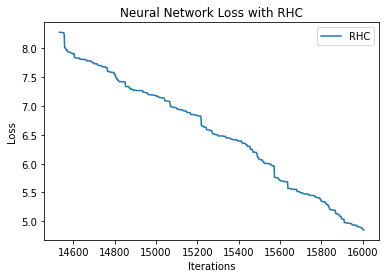

In [58]:
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title("Neural Network Loss with RHC")
ax.plot( rhc.fitness_curve[:,1],rhc.fitness_curve[:,0], label="RHC")

ax.legend()
plt.savefig('./paper/figures/nn_rhc.png', format='png', transparent=True)

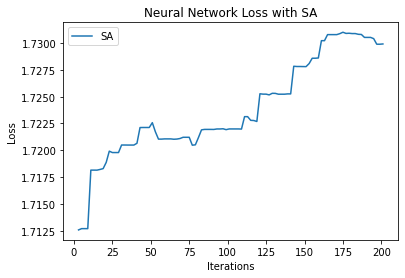

In [59]:
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title("Neural Network Loss with SA")
ax.plot( anneal.fitness_curve[:,1],anneal.fitness_curve[:,0], label="SA")

ax.legend()
plt.savefig('./paper/figures/nn_sa.png', format='png', transparent=True)

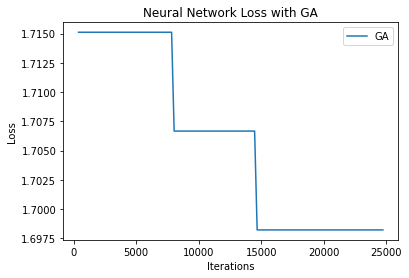

In [60]:
fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title("Neural Network Loss with GA")
ax.plot( ga.fitness_curve[:,1],ga.fitness_curve[:,0], label="GA")

ax.legend()
plt.savefig('./paper/figures/nn_ga.png', format='png', transparent=True)